# Fictional Healthcare Data

### Imports

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import random as rand
import datetime as dt
from dateutil.relativedelta import relativedelta as rd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

import statsmodels.api as sm
import statsmodels.formula.api as smf

from sklearn.metrics import mean_squared_error
#!pip install Faker
from faker import Faker



### Functions

In [2]:
# creates list of birthdate datetime objects based off age
def birthDate(age, date=None):
  if date == None:
    date = dt.datetime.now()
  return [date - rd(years=x,months=rand.randint(-12, 12),days=rand.randint(-31,31)) for x in age]

# creates list with multiple modes
def multimodallist(obs,stdperlist,modes):
    if obs<len(modes):
        raise Exception('obs is less than amount of modes')
    remainder = obs%len(modes)
    listSize =int((obs - remainder)/len(modes))
    multimodal = []
    # combines smaller lists with different modes to equal list with obs observations
    for i in modes:
        multimodal+=np.random.normal(i,stdperlist,listSize).astype(int).tolist()
    if remainder >0:
        multimodal+=np.random.normal(np.mean(multimodal),stdperlist,remainder).astype(int).tolist()
    return multimodal
def probablity_generator(length):
    return [1/length]*length
def ml_data(newColumn,std,mean):
    random = np.random.normal(mean,std,len(newColumn))
    return newColumn + random


### Data Dictionary

In [3]:
np.random.seed(101)
obs = 1000
fake = Faker()
Faker.seed(2)
# age = np.random.normal(50,6,obs).astype(int)
multimodalage = multimodallist(obs,5,[33,45,65])
mbti = ['ISTJ','ISFJ','INFJ','INTJ','ISTP','ISFP','INFP','INTP','ESTP','ESFP','ENFP','ENTP','ESTJ','ESFJ','ENFJ','ENTJ']
percentage = [0.116,0.138,0.015,0.021,0.054,0.088,0.044,0.033,0.043,0.085,0.081,0.032,0.087,0.12,0.025,0.018]
name = set()
while len(name) < obs:
    name.add(fake.name())
address = set()
while len(address) < obs:
    address.add(fake.address())
performance = ['1','2','3','4','5']

data = {'id':list(range(100000,100000+obs)),
        'age': multimodalage,
        'birthDate': birthDate(multimodalage,date=dt.datetime(2023,9,30)),
        'mbti': np.random.choice(mbti,size=obs,p=percentage),
        'name': list(name),
        'address':list(address),
        'performance':np.random.choice(performance,size=obs,p=[0.1,0.1,0.3,0.3,0.2])
        }
df = pd.DataFrame(data)

df['score'] = ml_data(((df['age']**2)/100 + df['age']/10 + 20),5,0).apply(lambda x: round(x,2))
df['salary'] = ml_data((df['score']*1000+20000),10000,0).apply(lambda x: round(x,2))
df['years_worked'] = ml_data(df['age']/30,1,5).apply(lambda x: round(x,2))
df['401k_total'] = (df['salary']*0.05 * df['years_worked']).apply(lambda x: round(x,2))

In [4]:
df.head()

,id,age,birthDate,mbti,name,address,performance,score,salary,years_worked,401k_total
0,100000,46,1977-10-21,INFP,Holly Stone,0422 Edwin Junctions Suite 730\nWest Susanview...,3,44.67,52632.50,7.43,19552.97
1,100001,36,1987-09-14,ESFJ,Gary Watson,94647 Kimberly Unions Apt. 518\nNorth Jessical...,5,28.29,68706.15,5.28,18138.42
2,100002,37,1986-01-25,ESFJ,Emily Peterson,"2808 Katelyn Groves Suite 176\nCasehaven, OK 5...",3,39.92,70697.17,5.56,19653.81
3,100003,35,1987-10-16,ISFJ,Steven Gomez,"904 Mitchell Stream Apt. 866\nSouth Joseph, MN...",3,38.73,55937.54,6.80,19018.76
4,100004,36,1987-03-25,ESFP,Erin Sanchez,"951 Scott Locks\nLake Linda, FM 31582",5,33.85,45449.69,6.76,15362.00


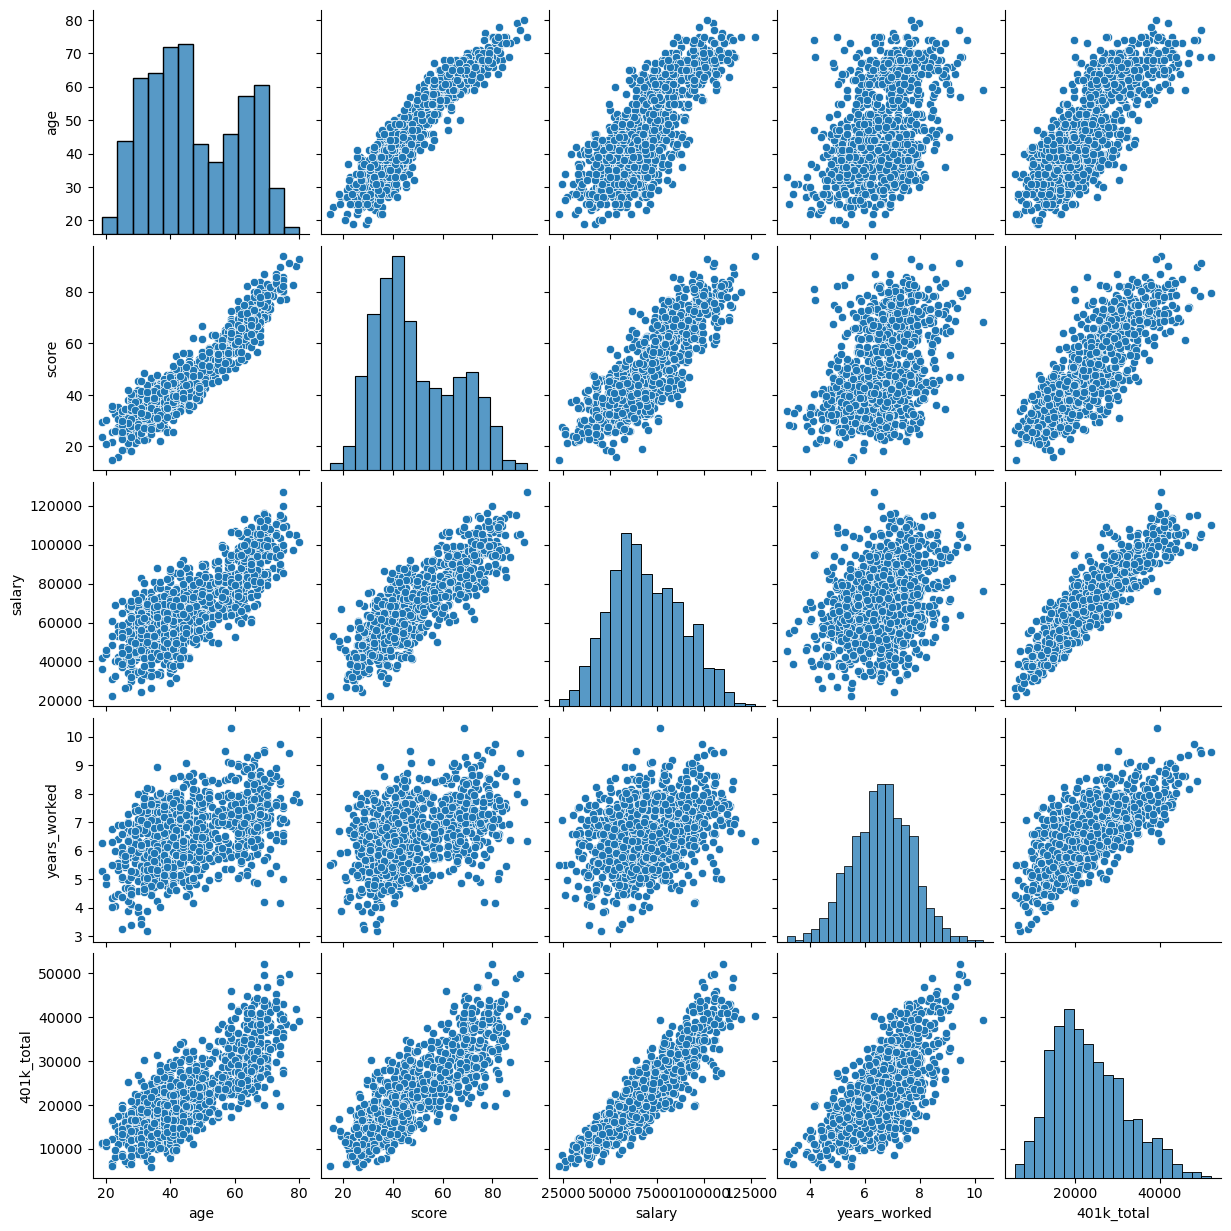

In [5]:
sns.pairplot(df.drop('id',axis=1))

<Axes: xlabel='score', ylabel='salary'>

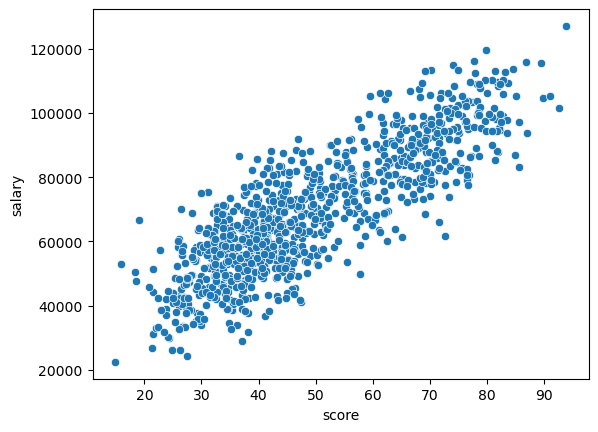

In [6]:
sns.scatterplot(data=df, y='salary', x='score')

# Machine Learning

In [7]:
data = df[['age','score']]
train, test = train_test_split(
    data, test_size=0.2, random_state=42)

model = smf.ols(
  formula='score ~ age + I(age**2)', data=train).fit()

ols_results_summary = model.summary()

print(ols_results_summary)

                            OLS Regression Results                            
Dep. Variable:                  score   R-squared:                       0.903
Model:                            OLS   Adj. R-squared:                  0.902
Method:                 Least Squares   F-statistic:                     3695.
Date:                Fri, 27 Oct 2023   Prob (F-statistic):               0.00
Time:                        11:48:45   Log-Likelihood:                -2450.4
No. Observations:                 800   AIC:                             4907.
Df Residuals:                     797   BIC:                             4921.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      19.8853      2.306      8.623      

<Axes: xlabel='age', ylabel='score'>

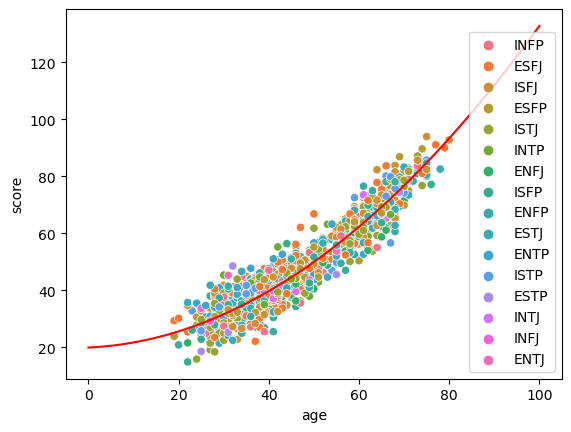

In [8]:
age = pd.DataFrame({'age':np.linspace(0,100,1000)})

score = model.predict(age)

sns.scatterplot(x='age',y='score', data=df, hue='mbti')
sns.lineplot(y=score, x=age['age'],  color='red')

### Data Visualization

count    1000.000000
mean       47.304000
std        14.163622
min        19.000000
25%        36.000000
50%        44.000000
75%        61.000000
max        80.000000
Name: age, dtype: float64
Axes(0.125,0.11;0.775x0.77)


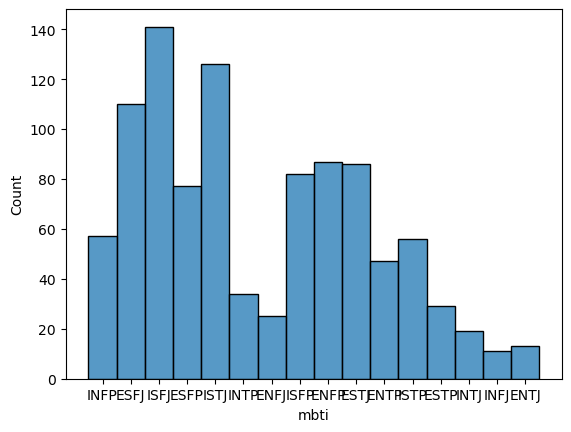

In [9]:
print(df['age'].describe())
print(sns.histplot(df['mbti']))

Axes(0.125,0.11;0.775x0.77)


,id,age,birthDate,mbti,name,address,performance,score,salary,years_worked,401k_total
940,100940,64,1959-05-21,ISTJ,Timothy Barnett,"41348 Donna Ranch\nLake Kylebury, PR 56985",3,71.25,101770.64,8.05,40962.68
761,100761,70,1954-09-13,ISTJ,Alexis Hayes,"PSC 6708, Box 6005\nAPO AE 83709",4,71.01,92408.15,6.81,31464.98
707,100707,70,1954-05-26,ESFJ,Taylor Hanson,"44532 Jose Alley Apt. 745\nEast Marcuston, KS ...",4,72.02,106255.17,6.90,36658.03
53,100053,30,1993-07-10,ESTP,Jon Ramirez,"2665 Mitchell Drives Suite 422\nWest Brett, MO...",2,34.54,52829.27,7.46,19705.32
464,100464,44,1979-12-29,ISFJ,Michelle Stephens,"0683 Rebecca Trail\nNguyenport, IN 12622",4,47.67,87456.99,5.87,25668.63


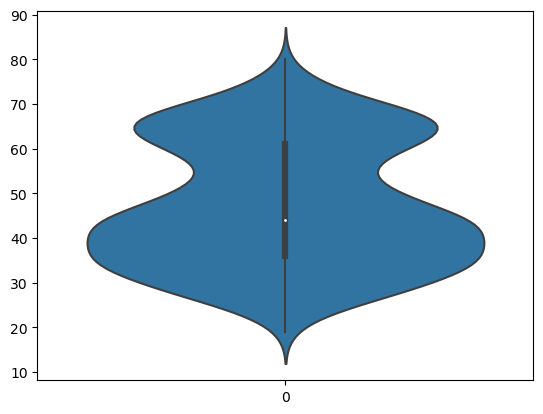

In [10]:
print(sns.violinplot(df['age']))
df.sample(5)

In [11]:
# Check type() of birthData column
type(df['birthDate'][0])

pandas._libs.tslibs.timestamps.Timestamp

<Axes: xlabel='age', ylabel='mbti'>

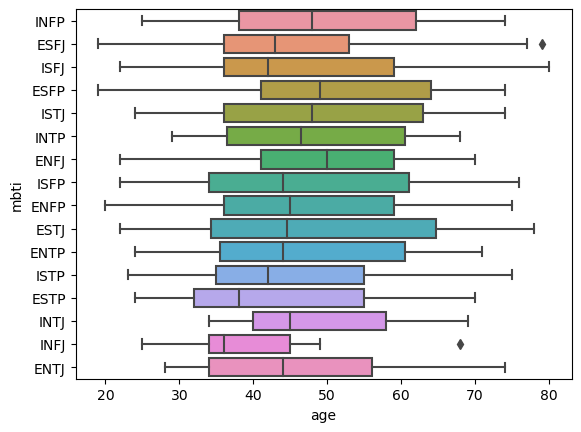

In [12]:
sns.boxplot(y='mbti', x='age', data=df)